# PCA_OPTICS

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(231017)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

In [3]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

### Import Data & Data Cleaning

In [4]:
currency_pairs = [
    'SGD=X', 'SGDMYR=X', 'GBPSGD=X', 'EURSGD=X', 'SGDJPY=X', 'SGDHKD=X', 'SGDIDR=X',
    'SGDCNY=X', 'SGDPHP=X', 'SGDTHB=X', 'SGDINR=X', 'SGDVND=X', 'SGDKRW=X', 'AUDSGD=X',
    'NZDSGD=X', 'GBPUSD=X', 'JPY=X', 'HKD=X', 'MYR=X', 'INR=X', 'CNY=X', 'PHP=X',
    'IDR=X', 'THB=X', 'CHF=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'KRW=X', 'VND=X',
    'CAD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X',
    'EURJPY=X'
]


SGD=X: USD/SGD (US Dollar / Singapore Dollar) \
SGDMYR=X: SGD/MYR (Singapore Dollar / Malaysian Ringgit) \
GBPSGD=X: GBP/SGD (British Pound / Singapore Dollar) \
EURSGD=X: EUR/SGD (Euro / Singapore Dollar) \
SGDJPY=X: SGD/JPY (Singapore Dollar / Japanese Yen) \
SGDHKD=X: SGD/HKD (Singapore Dollar / Hong Kong Dollar) \
SGDIDR=X: SGD/IDR (Singapore Dollar / Indonesian Rupiah) \
SGDCNY=X: SGD/CNY (Singapore Dollar / Chinese Yuan) \
SGDPHP=X: SGD/PHP (Singapore Dollar / Philippine Peso) \
SGDTHB=X: SGD/THB (Singapore Dollar / Thai Baht) \
SGDINR=X: SGD/INR (Singapore Dollar / Indian Rupee) \
SGDVND=X: SGD/VND (Singapore Dollar / Vietnamese Dong) \
SGDKRW=X: SGD/KRW (Singapore Dollar / South Korean Won) \
AUDSGD=X: AUD/SGD (Australian Dollar / Singapore Dollar) \
NZDSGD=X: NZD/SGD (New Zealand Dollar / Singapore Dollar) \
GBPUSD=X: GBP/USD (British Pound / US Dollar) \
JPY=X: USD/JPY (US Dollar / Japanese Yen) \
HKD=X: USD/HKD (US Dollar / Hong Kong Dollar) \
MYR=X: USD/MYR (US Dollar / Malaysian Ringgit) \
INR=X: USD/INR (US Dollar / Indian Rupee) \
CNY=X: USD/CNY (US Dollar / Chinese Yuan) \
PHP=X: USD/PHP (US Dollar / Philippine Peso) \
IDR=X: USD/IDR (US Dollar / Indonesian Rupiah) \
THB=X: USD/THB (US Dollar / Thai Baht) \
CHF=X: USD/CHF (US Dollar / Swiss Franc) \
MXN=X: USD/MXN (US Dollar / Mexican Peso) \
AUDUSD=X: AUD/USD (Australian Dollar / US Dollar) \
NZDUSD=X: NZD/USD (New Zealand Dollar / US Dollar) \
KRW=X: USD/KRW (US Dollar / South Korean Won) \
VND=X: USD/VND (US Dollar / Vietnamese Dong) \
CAD=X: USD/CAD (US Dollar / Canadian Dollar) \
EURJPY=X: EUR/JPY (Euro / Japanese Yen) \
GBPJPY=X: GBP/JPY (British Pound / Japanese Yen) \
EURGBP=X: EUR/GBP (Euro / British Pound) \
EURSEK=X: EUR/SEK (Euro / Swedish Krona) \
EURCHF=X: EUR/CHF (Euro / Swiss Franc) \
EURHUF=X: EUR/HUF (Euro / Hungarian Forint)

In [5]:
# Initialize an empty dictionary to store the data
forex_data = {}

# Download data for each currency pair and store the "Adj Close" values
for pair in currency_pairs:
    data = yf.download(pair, start='2013-12-31', end='2024-05-25')
    forex_data[pair] = data['Adj Close']

# Convert the dictionary to a DataFrame
forex_df = pd.DataFrame(forex_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGDPHP=X']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-12-31 -> 2024-05-25)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGDVND=X']: Excepti

In [6]:
forex_df.head()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDPHP=X,SGDTHB=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31 00:00:00,1.26698,2.5456,2.0894,1.74970,82.772003,6.1179,9619.500000,4.7758,NaN,25.896999,...,0.821760,1054.300049,21055.0,1.06450,144.899994,173.028000,0.83720,8.85440,1.22520,296.119995
2014-01-01 00:00:00,1.26231,2.5535,2.0894,1.73540,82.772003,6.1446,9647.799805,4.7880,NaN,25.875999,...,0.822707,1054.800049,20835.0,1.06193,144.750000,174.300003,0.82973,8.84327,1.22720,296.911987
2014-01-02 00:00:00,1.26401,2.5480,2.0950,1.73980,83.301003,6.1324,9493.000000,4.7769,NaN,25.879999,...,0.820883,1050.750000,21055.0,1.06445,145.011002,174.593002,0.83040,8.85220,1.22725,296.700012
2014-01-03 00:00:00,1.26695,2.5518,2.0834,1.73110,82.723000,6.1187,9672.599609,4.7692,NaN,25.997000,...,0.818733,1049.599976,21050.0,1.06691,143.257004,172.403000,0.83079,8.91160,1.22873,297.589996
2014-01-06 00:00:00,1.26645,2.5564,2.0780,1.72174,82.769997,6.1208,9485.299805,4.7690,NaN,26.028999,...,0.826720,1053.800049,21050.0,1.06305,142.626007,172.138000,0.82850,8.86360,1.23050,298.649994


In [7]:
forex_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDPHP=X,SGDTHB=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2711.000000,2706.000000,2712.000000,2712.000000,2711.000000,2711.000000,2676.000000,2711.000000,0.0,2711.000000,...,2711.000000,2711.000000,2713.000000,2711.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000
mean,1.355504,3.037714,1.831844,1.544555,86.246462,5.752673,10243.293559,4.909988,NaN,24.554234,...,0.686842,1171.956326,22707.886134,1.289887,132.795416,157.589578,0.846479,10.159160,1.083139,338.235582
std,0.040507,0.244677,0.150225,0.074509,9.949081,0.173600,989.753241,0.202730,NaN,1.270506,...,0.064005,89.226602,1258.342546,0.074900,11.841694,18.145485,0.051407,0.744096,0.072521,32.134684
min,1.237160,0.737200,1.542990,1.380500,73.753998,5.323541,9.580800,4.425900,NaN,21.271000,...,0.557240,999.830017,21.000000,1.061930,111.202003,125.961998,0.694100,8.754700,0.927700,296.118988
25%,1.339670,2.979950,1.730803,1.494792,80.110699,5.663500,9598.875244,4.779950,NaN,23.671000,...,0.641764,1114.114990,22084.000000,1.261235,124.256752,142.605251,0.833758,9.490075,1.043152,310.870499
50%,1.356660,3.050700,1.788035,1.538560,82.084999,5.749300,10403.600098,4.899397,NaN,24.665001,...,0.680092,1153.939941,22861.000000,1.308260,130.605003,153.019501,0.859000,10.215995,1.083720,323.447495
75%,1.378305,3.120914,1.875612,1.596500,89.535500,5.820600,10711.321777,5.028833,NaN,25.601500,...,0.718355,1210.000000,23253.000000,1.337845,138.730247,172.159996,0.881092,10.611050,1.129843,362.719505
max,1.456300,3.569286,2.222360,1.761400,116.162903,6.263000,11953.043945,5.447876,NaN,27.245575,...,0.882379,1443.959961,25469.000000,1.457800,169.822006,199.339005,0.979000,11.943280,1.238240,431.815002


In [8]:
forex_df.isna().sum().sort_values(ascending = False)

#drop 'SGDPHP=X' and 'SGDVND=X', other use ffill

SGDPHP=X    2714
SGDVND=X    2714
SGDIDR=X      38
SGDMYR=X       8
CNY=X          4
SGD=X          3
JPY=X          3
KRW=X          3
NZDUSD=X       3
AUDUSD=X       3
CHF=X          3
THB=X          3
IDR=X          3
PHP=X          3
INR=X          3
HKD=X          3
GBPUSD=X       3
CAD=X          3
NZDSGD=X       3
SGDKRW=X       3
SGDINR=X       3
SGDTHB=X       3
SGDCNY=X       3
SGDHKD=X       3
SGDJPY=X       3
EURGBP=X       2
GBPJPY=X       2
EURSEK=X       2
EURCHF=X       2
EURJPY=X       2
MYR=X          2
AUDSGD=X       2
EURSGD=X       2
GBPSGD=X       2
EURHUF=X       2
VND=X          1
MXN=X          1
dtype: int64

In [9]:
drop = ['SGDPHP=X', 'SGDVND=X']

forex_df = forex_df.drop(labels = drop, axis = 1)

In [10]:
forex_df.shape

(2714, 35)

In [11]:
forex_df = forex_df.fillna(method="ffill")

In [12]:
forex_df.isna().sum().sort_values(ascending = False)

SGD=X       0
KRW=X       0
IDR=X       0
THB=X       0
CHF=X       0
MXN=X       0
AUDUSD=X    0
NZDUSD=X    0
VND=X       0
CNY=X       0
CAD=X       0
EURJPY=X    0
GBPJPY=X    0
EURGBP=X    0
EURSEK=X    0
EURCHF=X    0
PHP=X       0
INR=X       0
SGDMYR=X    0
SGDTHB=X    0
GBPSGD=X    0
EURSGD=X    0
SGDJPY=X    0
SGDHKD=X    0
SGDIDR=X    0
SGDCNY=X    0
SGDINR=X    0
MYR=X       0
SGDKRW=X    0
AUDSGD=X    0
NZDSGD=X    0
GBPUSD=X    0
JPY=X       0
HKD=X       0
EURHUF=X    0
dtype: int64

### Exploratory Data Analysis (EDA)

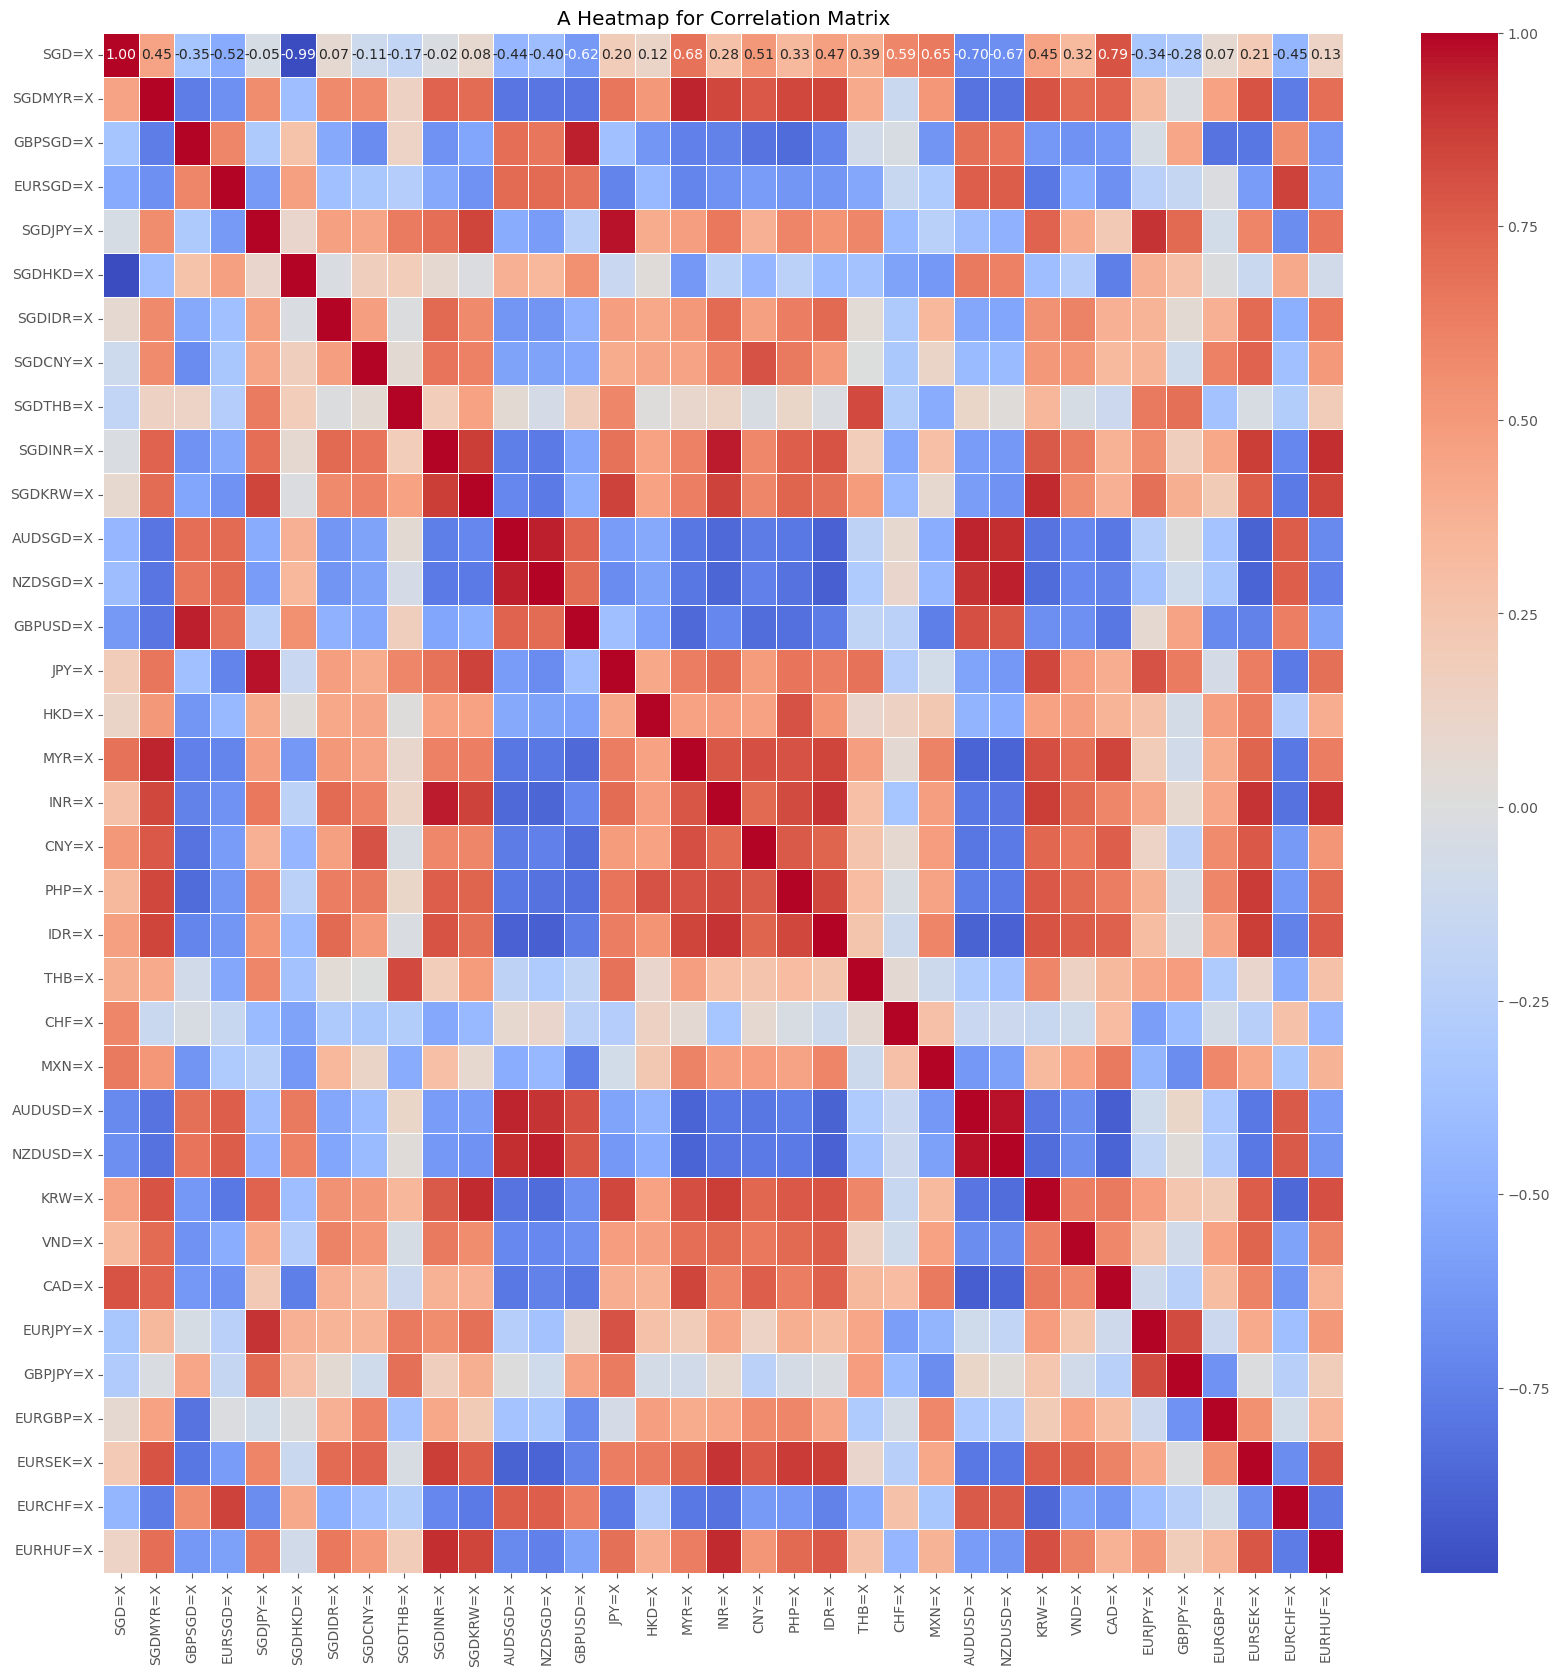

In [13]:
corr = forex_df.corr()

plt.figure(figsize = [20, 20])

plt.title("A Heatmap for Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.show()

### Calculate Return

In [14]:
return_df = forex_df.pct_change()

return_df.shape

(2714, 35)

In [15]:
return_df = return_df.dropna()

### Data Transformation

In [16]:
scaler = StandardScaler().fit(return_df)

In [17]:
scaled_df = pd.DataFrame(scaler.fit_transform(return_df),
                         columns = return_df.columns,
                         index = return_df.index)

scaled_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,...,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03
mean,-2.029748e-17,5.238059e-18,1.309515e-18,9.166604e-18,-5.238059e-18,1.309515e-17,-1.780940e-16,-5.892817e-18,-2.619030e-18,2.619030e-18,...,7.202331e-18,2.619030e-18,-4.714253e-17,1.571418e-17,-8.511846e-18,2.488078e-17,3.601166e-18,-1.178563e-17,1.964272e-18,9.166604e-18
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,...,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-5.394633e+00,-1.185698e+01,-1.415894e+01,-5.905539e+00,-7.190529e+00,-4.506012e+00,-6.851402e-02,-1.699507e+01,-5.481158e+00,-7.306025e+00,...,-5.613785e+00,-6.078578e+00,-6.407669e-02,-6.843971e+00,-3.550256e+01,-3.310672e+01,-1.811094e+01,-1.708849e+01,-3.203594e+01,-2.891770e+01
25%,-5.949627e-01,-4.555569e-02,-4.987609e-01,-5.248538e-01,-5.183118e-01,-5.703125e-01,-4.305014e-02,-4.279387e-01,-2.643929e-01,-4.762582e-01,...,-6.051734e-01,-5.736572e-01,-2.728105e-02,-5.538199e-01,-3.837662e-01,-3.729507e-01,-4.579545e-01,-5.377349e-01,-3.015396e-01,-4.245598e-01
50%,-2.412522e-02,-1.569774e-02,-1.011183e-02,-9.476313e-03,2.316605e-02,1.153485e-02,-4.297211e-02,-1.587358e-03,-6.010145e-03,-2.095962e-02,...,1.151233e-02,-1.079316e-03,-2.726355e-02,4.767820e-03,6.642116e-03,1.991503e-02,-1.403578e-02,-3.357933e-03,-1.322899e-02,-1.344379e-02
75%,5.712664e-01,1.673801e-02,4.964380e-01,5.057165e-01,5.284499e-01,5.839161e-01,-4.288892e-02,4.115919e-01,2.454312e-01,4.728641e-01,...,6.358850e-01,5.832595e-01,-2.724004e-02,5.694151e-01,4.147481e-01,4.071551e-01,4.176582e-01,5.519213e-01,3.106140e-01,4.403116e-01
max,4.771242e+00,5.060476e+01,5.736696e+00,1.346111e+01,5.125388e+00,5.437866e+00,2.562856e+01,1.893758e+01,4.845084e+00,7.324151e+00,...,4.408743e+00,5.076345e+00,3.684721e+01,6.517462e+00,3.190148e+00,5.077997e+00,2.013950e+01,6.747929e+00,2.636675e+01,5.235679e+00


In [18]:
scaler = StandardScaler().fit(return_df)

In [19]:
scaled_df = pd.DataFrame(scaler.fit_transform(return_df),
                         columns = return_df.columns,
                         index = return_df.index)

scaled_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,...,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03
mean,-2.029748e-17,5.238059e-18,1.309515e-18,9.166604e-18,-5.238059e-18,1.309515e-17,-1.780940e-16,-5.892817e-18,-2.619030e-18,2.619030e-18,...,7.202331e-18,2.619030e-18,-4.714253e-17,1.571418e-17,-8.511846e-18,2.488078e-17,3.601166e-18,-1.178563e-17,1.964272e-18,9.166604e-18
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,...,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-5.394633e+00,-1.185698e+01,-1.415894e+01,-5.905539e+00,-7.190529e+00,-4.506012e+00,-6.851402e-02,-1.699507e+01,-5.481158e+00,-7.306025e+00,...,-5.613785e+00,-6.078578e+00,-6.407669e-02,-6.843971e+00,-3.550256e+01,-3.310672e+01,-1.811094e+01,-1.708849e+01,-3.203594e+01,-2.891770e+01
25%,-5.949627e-01,-4.555569e-02,-4.987609e-01,-5.248538e-01,-5.183118e-01,-5.703125e-01,-4.305014e-02,-4.279387e-01,-2.643929e-01,-4.762582e-01,...,-6.051734e-01,-5.736572e-01,-2.728105e-02,-5.538199e-01,-3.837662e-01,-3.729507e-01,-4.579545e-01,-5.377349e-01,-3.015396e-01,-4.245598e-01
50%,-2.412522e-02,-1.569774e-02,-1.011183e-02,-9.476313e-03,2.316605e-02,1.153485e-02,-4.297211e-02,-1.587358e-03,-6.010145e-03,-2.095962e-02,...,1.151233e-02,-1.079316e-03,-2.726355e-02,4.767820e-03,6.642116e-03,1.991503e-02,-1.403578e-02,-3.357933e-03,-1.322899e-02,-1.344379e-02
75%,5.712664e-01,1.673801e-02,4.964380e-01,5.057165e-01,5.284499e-01,5.839161e-01,-4.288892e-02,4.115919e-01,2.454312e-01,4.728641e-01,...,6.358850e-01,5.832595e-01,-2.724004e-02,5.694151e-01,4.147481e-01,4.071551e-01,4.176582e-01,5.519213e-01,3.106140e-01,4.403116e-01
max,4.771242e+00,5.060476e+01,5.736696e+00,1.346111e+01,5.125388e+00,5.437866e+00,2.562856e+01,1.893758e+01,4.845084e+00,7.324151e+00,...,4.408743e+00,5.076345e+00,3.684721e+01,6.517462e+00,3.190148e+00,5.077997e+00,2.013950e+01,6.747929e+00,2.636675e+01,5.235679e+00


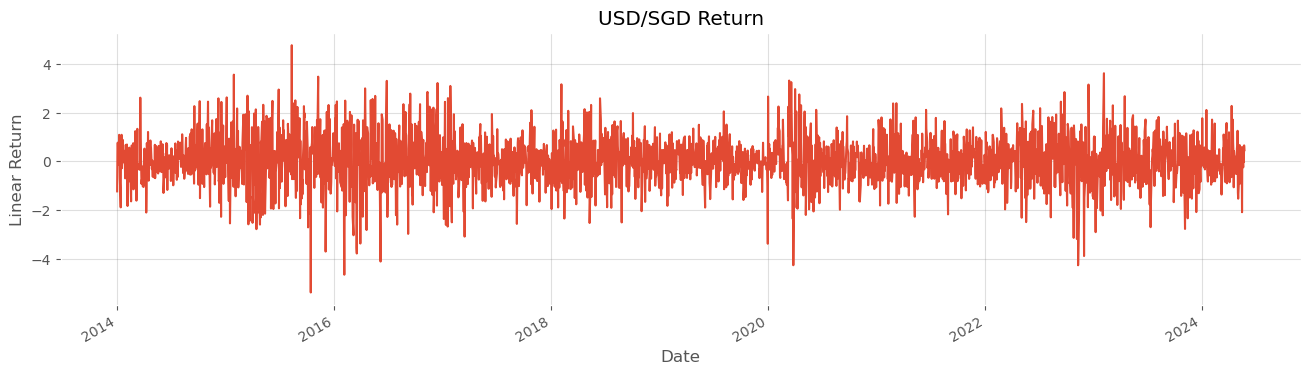

In [20]:
plt.figure(figsize = [16, 4])

plt.title("USD/SGD Return")

plt.ylabel("Linear Return")

scaled_df['SGD=X'].plot()

plt.show()

### PCA

In [21]:
prop = int(len(scaled_df) * 0.8)

X_Train = scaled_df[    : prop] # First 80% of the data

In [22]:
prop = int(len(forex_df) * 0.8)  # Split at 80% for training
forex_train = forex_df[:prop]        # First 80% of data for training
forex_test = forex_df[prop:]         # Remaining 20% of data for testing

In [23]:
correlation_matrix = X_Train.corr()

In [24]:
pca = PCA()
principal_components = pca.fit_transform(correlation_matrix)

In [25]:
from arch.unitroot.cointegration import engle_granger
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Initialize a list to store the results
results_table = []

# Assuming pca.components_ contains the principal components and forex_df contains the forex data
for i in range(pca.components_.shape[0]):
    first_component = pca.components_[i, :]
    highest = forex_train.columns[abs(first_component).argmax()]
    lowest = forex_train.columns[abs(first_component).argmin()]

    log_price = np.log(forex_train[[highest, lowest]])

     # Perform OLS regression of highest on lowest
    X = sm.add_constant(log_price[lowest])
    model = sm.OLS(log_price[highest], X).fit()
    cointegration_factor = model.params[1]  # The slope coefficient

    # Perform Engle-Granger cointegration test
    coint_result = engle_granger(log_price.iloc[:, 0], log_price.iloc[:, 1], trend="c", lags=0)
    pvalue_coint = coint_result.pvalue

    # Perform ADF test for stationarity
    adf_result = adfuller(log_price.iloc[:, 0] - log_price.iloc[:, 1], maxlag=0)
    pvalue_adf = adf_result[1]

    cointegrated = "Yes" if pvalue_coint < 0.05 else "No"
    stationary = "Yes" if pvalue_adf < 0.05 else "No"

    results_table.append([f'Principal Component {i+1}', highest, lowest, cointegration_factor, cointegrated, stationary])

# Print the results as a table using tabulate
print(tabulate(results_table, headers=["Component", "Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Component               Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
----------------------  ---------------  --------------  ----------------------  --------------  ------------
Principal Component 1   SGD=X            VND=X                        0.0231706  Yes             Yes
Principal Component 2   JPY=X            CNY=X                       -0.197788   No              No
Principal Component 3   GBPSGD=X         MXN=X                       -0.389281   No              No
Principal Component 4   EURSGD=X         GBPJPY=X                     0.0719028  No              No
Principal Component 5   EURJPY=X         CAD=X                       -0.662183   No              No
Principal Component 6   NZDSGD=X         INR=X                       -0.576451   No              No
Principal Component 7   EURCHF=X         SGDINR=X                    -0.225522   No              No
Principal Component 8   MYR=X            AUDSGD=X                    -0.972927   

In [26]:
# Filter the results table to include only pairs where both stationary and cointegrated are "Yes"
filtered_results = [result for result in results_table if result[4] == "Yes" and result[5] == "Yes"]

# Print the filtered results
print(tabulate(filtered_results, headers=["Component", "Highest Asset", "Lowest Asset", "Cointegrated Factor", "Cointegrated", "Stationary"]))

Component               Highest Asset    Lowest Asset      Cointegrated Factor  Cointegrated    Stationary
----------------------  ---------------  --------------  ---------------------  --------------  ------------
Principal Component 1   SGD=X            VND=X                       0.0231706  Yes             Yes
Principal Component 11  VND=X            GBPJPY=X                   -0.319707   Yes             Yes
Principal Component 12  SGDMYR=X         SGDKRW=X                    0.616545   Yes             Yes
Principal Component 13  SGDIDR=X         EURCHF=X                   -0.316249   Yes             Yes
Principal Component 15  AUDSGD=X         EURCHF=X                    0.717115   Yes             Yes
Principal Component 16  SGDTHB=X         JPY=X                       0.146243   Yes             Yes
Principal Component 19  EURHUF=X         SGDINR=X                    0.913706   Yes             Yes
Principal Component 29  EURJPY=X         VND=X                      -0.0387438  Yes 

### PCA + OPTICS Clustering

In [27]:
from sklearn.cluster import OPTICS

# Set parameters for OPTICS
min_samples_value = 2  # Adjust as needed
max_eps_value = np.inf  # Setting to infinity allows OPTICS to determine the optimal epsilon

# Apply OPTICS
clf = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
clf.fit(correlation_matrix)

# Extract the cluster labels
labels = clf.labels_

# Calculate the number of clusters
n_clusters_ = len(set(labels))
print(f"\nClusters discovered: {n_clusters_}")

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Stock': return_df.columns,
    'Cluster': labels
})

# Print the results as a table
print(tabulate(results_df, headers="keys", tablefmt="pretty"))

# Optional: Filter out noise points (label == -1) if needed
clustered_df = results_df[results_df['Cluster'] != -1]

print("\nClustered Stocks:")
print(tabulate(clustered_df, headers="keys", tablefmt="pretty"))

# Align the labels with the original DataFrame
clustered_series = pd.Series(index=return_df.columns, data=labels)

# Calculate the number of clusters and pairs to evaluate
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= CLUSTER_SIZE_LIMIT)]


Clusters discovered: 7
+----+----------+---------+
|    |  Stock   | Cluster |
+----+----------+---------+
| 0  |  SGD=X   |    0    |
| 1  | SGDMYR=X |   -1    |
| 2  | GBPSGD=X |    5    |
| 3  | EURSGD=X |   -1    |
| 4  | SGDJPY=X |    5    |
| 5  | SGDHKD=X |    4    |
| 6  | SGDIDR=X |   -1    |
| 7  | SGDCNY=X |    3    |
| 8  | SGDTHB=X |    3    |
| 9  | SGDINR=X |    3    |
| 10 | SGDKRW=X |   -1    |
| 11 | AUDSGD=X |   -1    |
| 12 | NZDSGD=X |    4    |
| 13 | GBPUSD=X |    5    |
| 14 |  JPY=X   |   -1    |
| 15 |  HKD=X   |   -1    |
| 16 |  MYR=X   |    2    |
| 17 |  INR=X   |    1    |
| 18 |  CNY=X   |   -1    |
| 19 |  PHP=X   |   -1    |
| 20 |  IDR=X   |    1    |
| 21 |  THB=X   |   -1    |
| 22 |  CHF=X   |   -1    |
| 23 |  MXN=X   |    2    |
| 24 | AUDUSD=X |    4    |
| 25 | NZDUSD=X |    4    |
| 26 |  KRW=X   |    0    |
| 27 |  VND=X   |   -1    |
| 28 |  CAD=X   |    0    |
| 29 | EURJPY=X |    5    |
| 30 | GBPJPY=X |    5    |
| 31 | EURGBP=X |   -1  

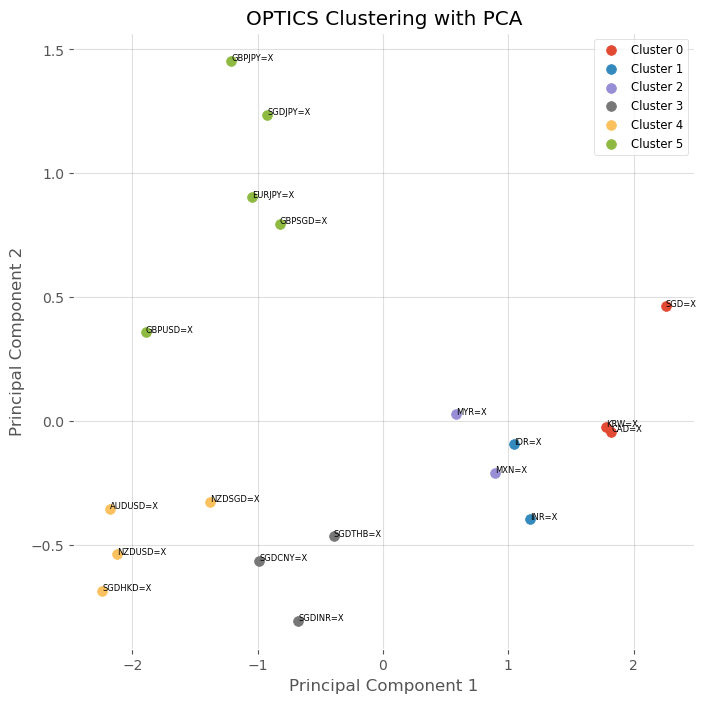

In [28]:
filtered_labels = labels[labels != -1]

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(correlation_matrix)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
pca_df = pca_df.loc[pca_df['Cluster'] != -1]

filtered_results1 = results_df.copy()
filtered_results1['Cluster'] = labels
filtered_results1 = filtered_results1.loc[filtered_results1['Cluster'] != -1]
filtered_results1 = filtered_results1.set_index(keys='Stock')

# Plot the clusters
plt.figure(figsize=(8, 8))

# Iterate over unique clusters and plot each with a separate color and label (excluding -1)
for cluster in np.unique(filtered_labels):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s = 50)

# Mark out filtered stock names on the plot
for i, txt in enumerate(filtered_results1.index):
    plt.annotate(txt, (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]), fontsize=6)

plt.title('OPTICS Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize='small')
plt.show()

In [29]:
from itertools import combinations

# Print clusters formed and pairs to evaluate
pairs_to_evaluate = int((ticker_count_reduced * (ticker_count_reduced - 1) / 2).sum())
print(f"Pairs to evaluate: {pairs_to_evaluate}")

# Group stocks by cluster
clusters = clustered_df.groupby('Cluster')['Stock'].apply(list).to_dict()

# Generate pairs from each cluster
pairs = []
for cluster, stocks in clusters.items():
    if len(stocks) > 1:
        pairs.extend(list(combinations(stocks, 2)))

# Display pairs of stocks
print("\nStock Pairs for Pairs Trading:")
for pair in pairs:
    print(pair)

Pairs to evaluate: 144

Stock Pairs for Pairs Trading:
('SGD=X', 'KRW=X')
('SGD=X', 'CAD=X')
('KRW=X', 'CAD=X')
('INR=X', 'IDR=X')
('MYR=X', 'MXN=X')
('SGDCNY=X', 'SGDTHB=X')
('SGDCNY=X', 'SGDINR=X')
('SGDTHB=X', 'SGDINR=X')
('SGDHKD=X', 'NZDSGD=X')
('SGDHKD=X', 'AUDUSD=X')
('SGDHKD=X', 'NZDUSD=X')
('NZDSGD=X', 'AUDUSD=X')
('NZDSGD=X', 'NZDUSD=X')
('AUDUSD=X', 'NZDUSD=X')
('GBPSGD=X', 'SGDJPY=X')
('GBPSGD=X', 'GBPUSD=X')
('GBPSGD=X', 'EURJPY=X')
('GBPSGD=X', 'GBPJPY=X')
('SGDJPY=X', 'GBPUSD=X')
('SGDJPY=X', 'EURJPY=X')
('SGDJPY=X', 'GBPJPY=X')
('GBPUSD=X', 'EURJPY=X')
('GBPUSD=X', 'GBPJPY=X')
('EURJPY=X', 'GBPJPY=X')


In [30]:
results_table1 = []

# Iterate through each pair directly
for pair in pairs:
    highest, lowest = pair  # Unpack the pair tuple

    log_price = np.log(forex_train[[highest, lowest]])

    # Perform OLS regression of highest on lowest
    X = sm.add_constant(log_price[lowest])
    model = sm.OLS(log_price[highest], X).fit()
    cointegration_factor = model.params[1]  # The slope coefficient

    # Perform Engle-Granger cointegration test
    coint_result = engle_granger(log_price.iloc[:, 0], log_price.iloc[:, 1], trend="c", lags=0)
    pvalue_coint = coint_result.pvalue

    # Perform ADF test for stationarity on residuals
    residuals = model.resid
    adf_result = adfuller(residuals, maxlag=0)
    adf_statistic, pvalue_adf, _, _, adf_critical_values, _ = adf_result

    cointegrated = "Yes" if pvalue_coint < 0.05 else "No"
    stationary = "Yes" if pvalue_adf < 0.05 else "No"

    results_table1.append([highest, lowest, cointegration_factor, cointegrated, stationary])

# Print the results as a table using tabulate
print(tabulate(results_table1, headers=["Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
---------------  --------------  ----------------------  --------------  ------------
SGD=X            KRW=X                         0.559117  No              Yes
SGD=X            CAD=X                         0.460465  Yes             Yes
KRW=X            CAD=X                         0.533489  No              Yes
INR=X            IDR=X                         0.902843  Yes             Yes
MYR=X            MXN=X                         0.512549  No              Yes
SGDCNY=X         SGDTHB=X                     -0.376809  Yes             Yes
SGDCNY=X         SGDINR=X                      0.187351  No              Yes
SGDTHB=X         SGDINR=X                     -0.442553  Yes             Yes
SGDHKD=X         NZDSGD=X                      0.301915  No              No
SGDHKD=X         AUDUSD=X                      0.299359  No              No
SGDHKD=X         NZDUSD=X                      0.313666  No   

In [31]:
filtered_results1 = [result for result in results_table1 if result[3] == "Yes" and result[4] == "Yes"]

# Print the filtered results
print(tabulate(filtered_results1, headers=["Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
---------------  --------------  ----------------------  --------------  ------------
SGD=X            CAD=X                         0.460465  Yes             Yes
INR=X            IDR=X                         0.902843  Yes             Yes
SGDCNY=X         SGDTHB=X                     -0.376809  Yes             Yes
SGDTHB=X         SGDINR=X                     -0.442553  Yes             Yes
NZDSGD=X         AUDUSD=X                      0.592968  Yes             Yes
AUDUSD=X         NZDUSD=X                      1.02699   Yes             Yes


### Convert all Currency to USD

In [32]:
converted_us = forex_df.copy()

converted_us['SGD=X'] = 1/forex_df['SGD=X']
converted_us['SGDMYR=X'] = forex_df['SGDMYR=X']/forex_df['MYR=X']
converted_us['GBPSGD=X'] = forex_df['GBPSGD=X']/forex_df['SGD=X']
converted_us['EURSGD=X'] = forex_df['EURSGD=X']/forex_df['SGD=X']
converted_us['SGDJPY=X'] = forex_df['SGDJPY=X']/forex_df['JPY=X']
converted_us['SGDHKD=X'] = forex_df['SGDJPY=X']/forex_df['HKD=X']
converted_us['SGDIDR=X'] = forex_df['SGDIDR=X']/forex_df['IDR=X']
converted_us['SGDCNY=X'] = forex_df['SGDCNY=X']/forex_df['CNY=X']
converted_us['SGDTHB=X'] = forex_df['SGDTHB=X']/forex_df['THB=X']
converted_us['SGDINR=X'] = forex_df['SGDINR=X']/forex_df['INR=X']
converted_us['SGDKRW=X'] = forex_df['SGDKRW=X']/forex_df['KRW=X']
converted_us['AUDSGD=X'] = forex_df['AUDSGD=X']/forex_df['SGD=X']
converted_us['NZDSGD=X'] = forex_df['NZDSGD=X']/forex_df['SGD=X']
converted_us['SGDINR=X'] = forex_df['SGDINR=X']/forex_df['INR=X']
converted_us['JPY=X'] = 1/forex_df['JPY=X']
converted_us['HKD=X'] = 1/forex_df['HKD=X']
converted_us['MYR=X'] = 1/forex_df['MYR=X']
converted_us['INR=X'] = 1/forex_df['INR=X']
converted_us['CNY=X'] = 1/forex_df['CNY=X']
converted_us['INR=X'] = 1/forex_df['INR=X']
converted_us['PHP=X'] = 1/forex_df['PHP=X']
converted_us['IDR=X'] = 1/forex_df['IDR=X']
converted_us['THB=X'] = 1/forex_df['THB=X']
converted_us['CHF=X'] = 1/forex_df['CHF=X']
converted_us['MXN=X'] = 1/forex_df['MXN=X']
converted_us['KRW=X'] = 1/forex_df['KRW=X']
converted_us['VND=X'] = 1/forex_df['VND=X']
converted_us['CAD=X'] = 1/forex_df['CAD=X']
converted_us['EURJPY=X'] = forex_df['EURJPY=X']/forex_df['JPY=X']
converted_us['GBPJPY=X'] = forex_df['GBPJPY=X']/forex_df['JPY=X']
converted_us['EURGBP=X'] = forex_df['EURGBP=X'] * forex_df['GBPUSD=X']
converted_us['EURCHF=X'] = forex_df['EURCHF=X'] * forex_df['CHF=X']

# Garch

## correlation test

In [33]:
converted_us = converted_us.copy().sort_index()[3:]
converted_us

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,0.789297,0.777798,1.644422,1.366352,0.789093,10.669227,0.799256,0.789511,0.789031,0.791154,...,0.818733,0.000953,0.000048,0.937286,1.366526,1.644549,1.366476,8.91160,1.104800,297.589996
2014-01-06,0.789609,0.778441,1.640807,1.359501,0.788947,10.674586,0.783132,0.789373,0.789883,0.789185,...,0.826720,0.000949,0.000048,0.940689,1.359482,1.640785,1.359824,8.86360,1.113639,298.649994
2014-01-07,0.789129,0.773839,1.641546,1.363062,0.788753,10.600410,0.789524,0.789250,0.788646,0.788204,...,0.828981,0.000939,0.000048,0.938007,1.363065,1.641455,1.362919,8.87144,1.113225,299.274994
2014-01-08,0.786541,0.773734,1.639937,1.361683,0.786223,10.617537,0.782652,0.786781,0.786566,0.788579,...,0.828226,0.000936,0.000048,0.928247,1.361630,1.639831,1.361492,8.87040,1.125956,299.684998
2014-01-09,0.785435,0.771465,1.644387,1.356996,0.785071,10.614454,0.784615,0.785990,0.785213,0.785109,...,0.826378,0.000939,0.000048,0.924018,1.357169,1.644634,1.357215,8.92160,1.127617,299.679993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,0.743588,0.743417,1.270562,1.087253,0.743506,14.842385,0.743417,0.723014,0.729433,0.733071,...,0.613670,0.000739,0.000039,0.734867,1.087259,1.270593,1.087255,11.63277,0.897986,386.739014
2024-05-21,0.742203,0.742165,1.270941,1.086021,0.741932,14.876313,0.742154,0.727066,0.741604,0.741477,...,0.610810,0.000735,0.000039,0.734160,1.086027,1.270998,1.086065,11.59510,0.899563,385.743988
2024-05-22,0.742269,0.742096,1.271054,1.085480,0.742216,14.859594,0.742225,0.726623,0.742606,0.741506,...,0.609381,0.000733,0.000039,0.733122,1.085478,1.271064,1.085471,11.60531,0.901228,385.304993


In [34]:
# Get Correlation pair
correlation_matrix = converted_us.corr()

# Transform the correlation matrix into a long format
correlation_pairs = correlation_matrix.stack().reset_index()
correlation_pairs.columns = ['Pair1', 'Pair2', 'Correlation']

# Filter out duplicate pairs and self-correlations
correlation_pairs = correlation_pairs[correlation_pairs['Pair1'] != correlation_pairs['Pair2']]
correlation_pairs = correlation_pairs[correlation_pairs[['Pair1', 'Pair2']].apply(frozenset, axis=1).duplicated() == False]

# Format the pairs
correlation_pairs['Pair'] = correlation_pairs['Pair1'] + '-' + correlation_pairs['Pair2']
correlation_pairs = correlation_pairs[['Pair', 'Correlation']]

# Display the result
print(correlation_pairs)

                   Pair  Correlation
1        SGD=X-SGDMYR=X     0.849839
2        SGD=X-GBPSGD=X     0.633934
3        SGD=X-EURSGD=X     0.811766
4        SGD=X-SGDJPY=X     0.999936
5        SGD=X-SGDHKD=X     0.046705
...                 ...          ...
1118  EURGBP=X-EURCHF=X     0.409911
1119  EURGBP=X-EURHUF=X    -0.461530
1153  EURSEK=X-EURCHF=X    -0.619593
1154  EURSEK=X-EURHUF=X     0.784604
1189  EURCHF=X-EURHUF=X    -0.786491

[595 rows x 2 columns]


In [35]:
# filter out corr < 0.9
correlation_pairs = correlation_pairs[correlation_pairs["Correlation"] > 0.9]
correlation_pairs

,Pair,Correlation
4,SGD=X-SGDJPY=X,0.999936
7,SGD=X-SGDCNY=X,0.988591
8,SGD=X-SGDTHB=X,0.987970
9,SGD=X-SGDINR=X,0.996116
10,SGD=X-SGDKRW=X,0.996146
83,GBPSGD=X-GBPUSD=X,0.999978
100,GBPSGD=X-GBPJPY=X,0.995109
134,EURSGD=X-EURJPY=X,0.989703
136,EURSGD=X-EURGBP=X,0.999604
147,SGDJPY=X-SGDCNY=X,0.988459


## stationary test

In [36]:
pair = correlation_pairs["Pair"]
pair = pair.str.split('-', expand=True)
cols = pd.concat([pair[0],pair[1]])
cols = cols.drop_duplicates()
cols

4          SGD=X
83      GBPSGD=X
134     EURSGD=X
147     SGDJPY=X
253     SGDCNY=X
289     SGDTHB=X
325     SGDINR=X
397     AUDSGD=X
440     NZDSGD=X
485     GBPUSD=X
615        INR=X
724        IDR=X
865     AUDUSD=X
1046    EURJPY=X
10      SGDKRW=X
100     GBPJPY=X
136     EURGBP=X
410     NZDUSD=X
413        CAD=X
dtype: object

In [37]:
from statsmodels.tsa.stattools import adfuller
lnx = np.log(converted_us[cols])
adf = lnx.apply(adfuller).iloc[0:2].T
adf.columns = ["ADF", "pvalue"]
adf

,ADF,pvalue
SGD=X,-2.989317,0.035904
GBPSGD=X,-2.237912,0.192775
EURSGD=X,-2.706141,0.072982
SGDJPY=X,-2.98697,0.036129
SGDCNY=X,-3.172179,0.021653
SGDTHB=X,-3.137114,0.023926
SGDINR=X,-3.189361,0.020609
AUDSGD=X,-2.352999,0.155444
NZDSGD=X,-2.269457,0.182008
GBPUSD=X,-2.24579,0.190048


In [38]:
# List of pairs
pairs = correlation_pairs["Pair"].to_list()

# List of items
items = adf[adf["pvalue"] < 0.05].index

# Function to check if pair can be formed from items
def can_form_pair(pair, items):
    first, second = pair.split('-')
    return first in items and second in items

# valid pairs
valid_pairs1 = [pair for pair in pairs if can_form_pair(pair, items)]
valid_pairs1

['SGD=X-SGDJPY=X',
 'SGD=X-SGDCNY=X',
 'SGD=X-SGDTHB=X',
 'SGD=X-SGDINR=X',
 'SGD=X-SGDKRW=X',
 'SGDJPY=X-SGDCNY=X',
 'SGDJPY=X-SGDTHB=X',
 'SGDJPY=X-SGDINR=X',
 'SGDJPY=X-SGDKRW=X',
 'SGDCNY=X-SGDTHB=X',
 'SGDCNY=X-SGDINR=X',
 'SGDCNY=X-SGDKRW=X',
 'SGDTHB=X-SGDINR=X',
 'SGDTHB=X-SGDKRW=X',
 'SGDINR=X-SGDKRW=X']

### first-order-difference

In [39]:
cols = adf[adf["pvalue"] > 0.05].index.to_list()
adf = converted_us[cols].diff().dropna().apply(adfuller).iloc[0:2].T
adf.columns = ["ADF", "pvalue"]
adf

,ADF,pvalue
GBPSGD=X,-30.678097,0.0
EURSGD=X,-55.04041,0.0
AUDSGD=X,-30.774449,0.0
NZDSGD=X,-43.326504,0.0
GBPUSD=X,-51.407972,0.0
INR=X,-28.553673,0.0
IDR=X,-32.560513,0.0
AUDUSD=X,-42.66538,0.0
EURJPY=X,-22.352436,0.0
GBPJPY=X,-25.171322,0.0


In [40]:
# List of pairs
pairs = correlation_pairs["Pair"].to_list()

# List of items
items = adf.index.to_list()

# Function to check if pair can be formed from items
def can_form_pair(pair, items):
    first, second = pair.split('-')
    return first in items and second in items

# valid pairs
valid_pairs2 = [pair for pair in pairs if can_form_pair(pair, items)]
valid_pairs2

['GBPSGD=X-GBPUSD=X',
 'GBPSGD=X-GBPJPY=X',
 'EURSGD=X-EURJPY=X',
 'EURSGD=X-EURGBP=X',
 'AUDSGD=X-NZDSGD=X',
 'AUDSGD=X-AUDUSD=X',
 'AUDSGD=X-NZDUSD=X',
 'NZDSGD=X-IDR=X',
 'NZDSGD=X-AUDUSD=X',
 'NZDSGD=X-NZDUSD=X',
 'GBPUSD=X-GBPJPY=X',
 'INR=X-IDR=X',
 'IDR=X-AUDUSD=X',
 'IDR=X-NZDUSD=X',
 'AUDUSD=X-NZDUSD=X',
 'EURJPY=X-EURGBP=X']

## cointegration test

In [41]:
from statsmodels.tsa.stattools import coint

df = converted_us.copy()
df = np.log(df)

# List of pairs
pairs = valid_pairs2 + valid_pairs1

# Function to perform cointegration test
def perform_cointegration_test(series1, series2):
    coint_test = coint(series1, series2)
    return coint_test[0], coint_test[1], coint_test[2]

# Perform cointegration test for each pair and store results
results = []
for pair in pairs:
    series1, series2 = pair.split('-')
    if series1 in df.columns and series2 in df.columns:
        coint_statistic, p_value, critical_values = perform_cointegration_test(df[series1], df[series2])
        results.append({
            'pair': pair,
            'coint_statistic': coint_statistic,
            'p_value': p_value,
        })
results_df = pd.DataFrame(results)
results_df

,pair,coint_statistic,p_value
0,GBPSGD=X-GBPUSD=X,-51.742891,0.000000e+00
1,GBPSGD=X-GBPJPY=X,-51.285670,0.000000e+00
2,EURSGD=X-EURJPY=X,-28.286606,0.000000e+00
3,EURSGD=X-EURGBP=X,-52.171699,0.000000e+00
4,AUDSGD=X-NZDSGD=X,-5.006524,1.601548e-04
5,AUDSGD=X-AUDUSD=X,-52.073023,0.000000e+00
6,AUDSGD=X-NZDUSD=X,-5.004898,1.612619e-04
7,NZDSGD=X-IDR=X,-4.073006,5.635121e-03
8,NZDSGD=X-AUDUSD=X,-4.685465,5.973235e-04
9,NZDSGD=X-NZDUSD=X,-13.243931,9.183180e-24


In [42]:
coint = results_df.copy()
pairs = coint[coint["p_value"] < 0.05]["pair"]
pairs = pairs.values.tolist()
pairs

['GBPSGD=X-GBPUSD=X',
 'GBPSGD=X-GBPJPY=X',
 'EURSGD=X-EURJPY=X',
 'EURSGD=X-EURGBP=X',
 'AUDSGD=X-NZDSGD=X',
 'AUDSGD=X-AUDUSD=X',
 'AUDSGD=X-NZDUSD=X',
 'NZDSGD=X-IDR=X',
 'NZDSGD=X-AUDUSD=X',
 'NZDSGD=X-NZDUSD=X',
 'GBPUSD=X-GBPJPY=X',
 'IDR=X-NZDUSD=X',
 'AUDUSD=X-NZDUSD=X',
 'EURJPY=X-EURGBP=X',
 'SGD=X-SGDJPY=X',
 'SGD=X-SGDTHB=X',
 'SGD=X-SGDINR=X',
 'SGD=X-SGDKRW=X',
 'SGDJPY=X-SGDTHB=X',
 'SGDJPY=X-SGDINR=X',
 'SGDJPY=X-SGDKRW=X',
 'SGDTHB=X-SGDINR=X',
 'SGDTHB=X-SGDKRW=X',
 'SGDINR=X-SGDKRW=X']

## Euclidean distance

In [43]:
df = converted_us.copy()

# Calculating the Euclidean distance
def calculate_euclidean_distance(df, col1, col2):
    log_diff = np.log(df[col1]) - np.log(df[col2])
    squared_diff = np.square(log_diff)
    sum_squared_diff = np.sum(squared_diff)
    euclidean_distance = np.sqrt(sum_squared_diff)
    return euclidean_distance



# Perform cointegration test for each pair and store results
results = []
for pair in pairs:
    series1, series2 = pair.split('-')
    if series1 in df.columns and series2 in df.columns:
        euclidean_distance = calculate_euclidean_distance(df, series1, series2)
        results.append({
            'pair': pair,
            'euclidean_distance': euclidean_distance
        })
results_df = pd.DataFrame(results)
results_df

,pair,euclidean_distance
0,GBPSGD=X-GBPUSD=X,0.036741
1,GBPSGD=X-GBPJPY=X,0.638077
2,EURSGD=X-EURJPY=X,0.638747
3,EURSGD=X-EURGBP=X,0.113585
4,AUDSGD=X-NZDSGD=X,3.944722
5,AUDSGD=X-AUDUSD=X,0.481366
6,AUDSGD=X-NZDUSD=X,3.930524
7,NZDSGD=X-IDR=X,477.093495
8,NZDSGD=X-AUDUSD=X,3.914406
9,NZDSGD=X-NZDUSD=X,0.026928


In [44]:
results_df.min()

pair                  AUDSGD=X-AUDUSD=X
euclidean_distance             0.024623
dtype: object

## Build Mspread

In [57]:
import statsmodels.api as sm

col1 = "AUDSGD=X"
col2 = "AUDUSD=X"

# col1 = "SGDJPY=X"
# col2 = "SGDKRW=X"

# col1 = "SGDJPY=X"
# col2 = "SGDTHB=X"

# col1 = "AUDSGD=X"
# col2 = "NZDSGD=X"

# col1 = 
# col2 = 

pair = converted_us[[col1, col2]].copy()
pair = np.log(pair)

ratio = 0.7
train = pair[:int(len(pair)*ratio)]
test = pair[int(len(pair)*ratio):]

df = train
# Define the independent variables (X) and dependent variable (Y)
X = df[[col1]]
Y = df[col2]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               AUDUSD=X   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.228e+05
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:46:07   Log-Likelihood:                 5867.0
No. Observations:                1897   AIC:                        -1.173e+04
Df Residuals:                    1895   BIC:                        -1.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.001     -4.817      0.0

$ln$(AUDUSD=X)$_t$ = $-0.0037 + 0.9869ln$(AUDSGD=X)$_t$

In [58]:
a = model.params[0]
b = model.params[1]
data = train[col2] - b*train[col1] - a

data

Date
2014-01-03    0.002925
2014-01-06    0.002785
2014-01-07    0.002782
2014-01-08    0.002660
2014-01-09    0.002684
                ...   
2021-04-06    0.001461
2021-04-07    0.001483
2021-04-08    0.000104
2021-04-09    0.000691
2021-04-12    0.000527
Length: 1897, dtype: float64

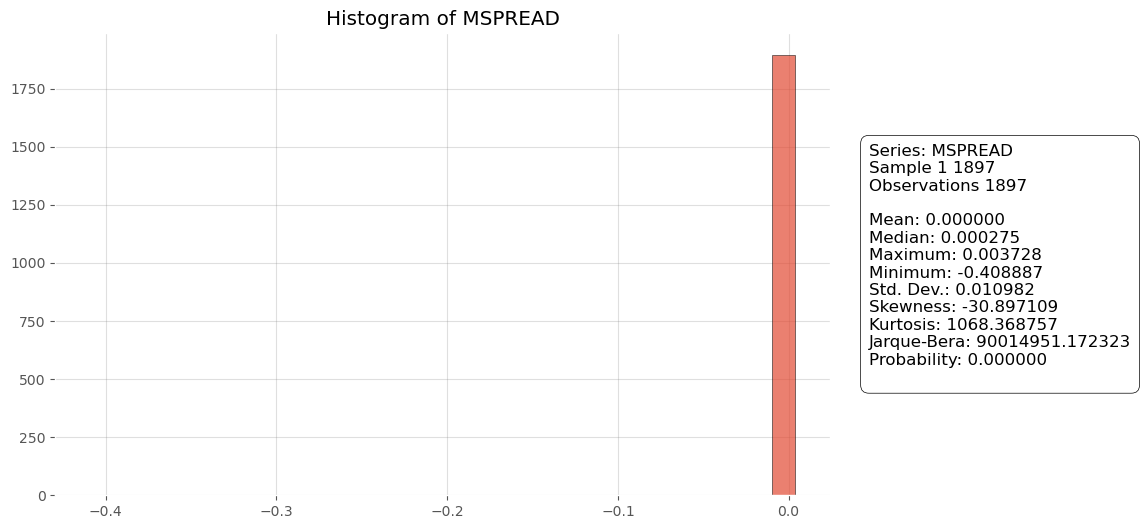

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera


# Convert the data to a pandas Series
series = pd.Series(data, name='MSPREAD')

# Calculate descriptive statistics
mean = series.mean()
median = series.median()
maximum = series.max()
minimum = series.min()
std_dev = series.std()
skewness = skew(series)
kurt = kurtosis(series, fisher=True) + 3  # To match pandas' definition of kurtosis
jb_stat, jb_p_value = jarque_bera(series)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(series, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of MSPREAD')

# Create text box with statistics
stats_text = f'''\
Series: {series.name}
Sample 1 {len(series)}
Observations {len(series)}

Mean: {mean:.6f}
Median: {median:.6f}
Maximum: {maximum:.6f}
Minimum: {minimum:.6f}
Std. Dev.: {std_dev:.6f}
Skewness: {skewness:.6f}
Kurtosis: {kurt:.6f}
Jarque-Bera: {jb_stat:.6f}
Probability: {jb_p_value:.6f}
'''

# Add the text box to the plot
plt.gca().text(1.05, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='center', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

# Show the plot
plt.show()

## garch

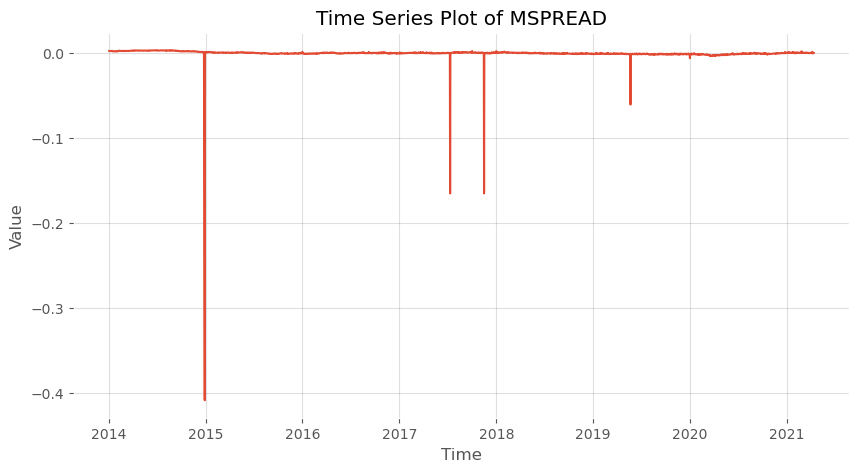

In [60]:
a = model.params[0]
b = model.params[1]
data = train[col2] - b*train[col1] - a
####################### outlier
# data = data[data > -0.1]

# Convert the data to a pandas Series
series = pd.Series(data, name='MSPREAD')

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(series)
plt.title('Time Series Plot of MSPREAD')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

# Show the plot
plt.show()

**var is not constant**

## autorelation test

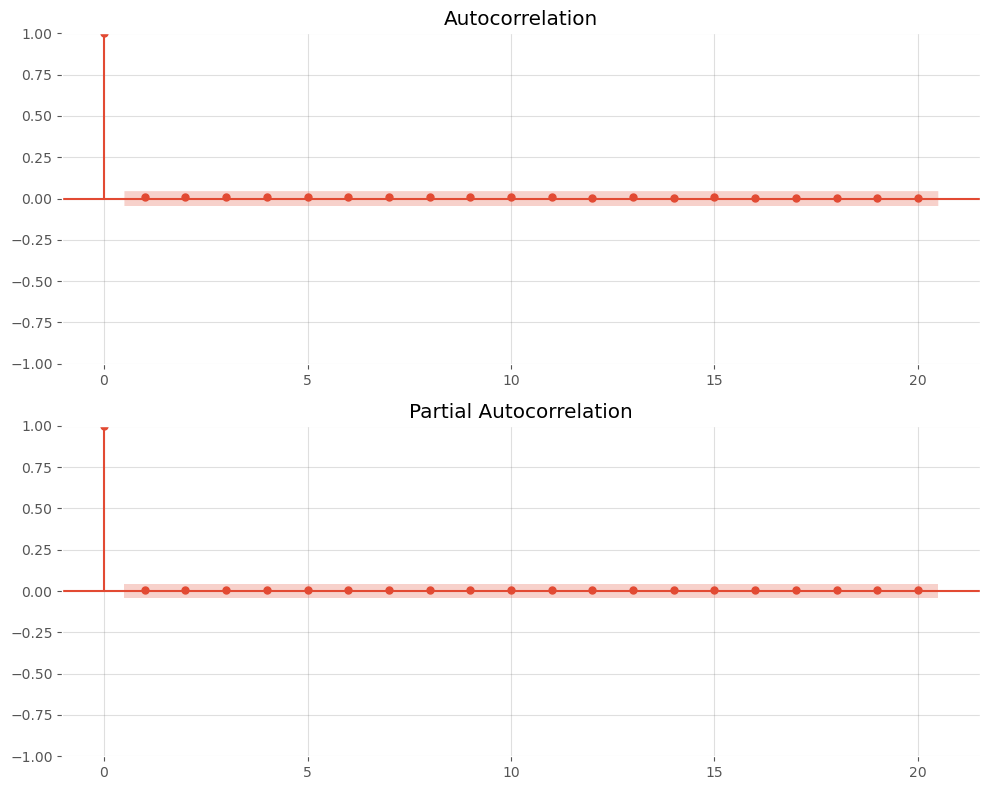

Lag  AC      PAC     Q-Stat  Prob
  1  0.008  0.008  0.126  0.723
  2  0.009  0.009  0.291  0.864
  3  0.007  0.007  0.385  0.943
  4  0.007  0.007  0.490  0.974
  5  0.007  0.007  0.590  0.988
  6  0.006  0.006  0.670  0.995
  7  0.007  0.006  0.755  0.998
  8  0.007  0.007  0.851  0.999
  9  0.007  0.006  0.933  1.000
 10  0.007  0.006  1.021  1.000
 11  0.007  0.006  1.102  1.000
 12  0.006  0.005  1.169  1.000
 13  0.007  0.006  1.254  1.000
 14  0.005  0.005  1.305  1.000
 15  0.007  0.006  1.394  1.000
 16  0.006  0.005  1.456  1.000
 17  0.005  0.005  1.513  1.000
 18  0.005  0.005  1.564  1.000
 19  0.006  0.005  1.627  1.000
 20  0.006  0.005  1.692  1.000


In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat



# Convert the data to a pandas Series
series = pd.Series(data, name='MSPREAD')

# Calculate autocorrelation and partial autocorrelation
acf_values = acf(series, nlags=20)
pacf_values = pacf(series, nlags=20)
q_stat_values, p_values = q_stat(acf_values[1:], len(series))

# Plot the autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(series, lags=20, ax=ax[0])
ax[0].set_title('Autocorrelation')

plot_pacf(series, lags=20, ax=ax[1])
ax[1].set_title('Partial Autocorrelation')

plt.tight_layout()
plt.show()

# Display the statistics
print("Lag  AC      PAC     Q-Stat  Prob")
for i in range(1, 21):
    print(f"{i:>3}  {acf_values[i]:.3f}  {pacf_values[i]:.3f}  {q_stat_values[i-1]:.3f}  {p_values[i-1]:.3f}")


**don't need to garch, not every pair need to do**

**col1 = "AUDSGD=X"col2 = "NZDSGD=X" AR1**

                            AutoReg Model Results                             
Dep. Variable:                MSPREAD   No. Observations:                 1894
Model:                     AutoReg(7)   Log Likelihood                5589.341
Method:               Conditional MLE   S.D. of innovations              0.013
Date:                Sat, 08 Jun 2024   AIC                         -11160.681
Time:                        19:44:54   BIC                         -11110.796
Sample:                    01-17-2014   HQIC                        -11142.311
                         - 04-12-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.845e-05      0.000     -0.133      0.894      -0.001       0.001
MSPREAD.L1     0.3025      0.023     13.157      0.000       0.257       0.348
MSPREAD.L2     0.2029      0.024      8.461      0.0

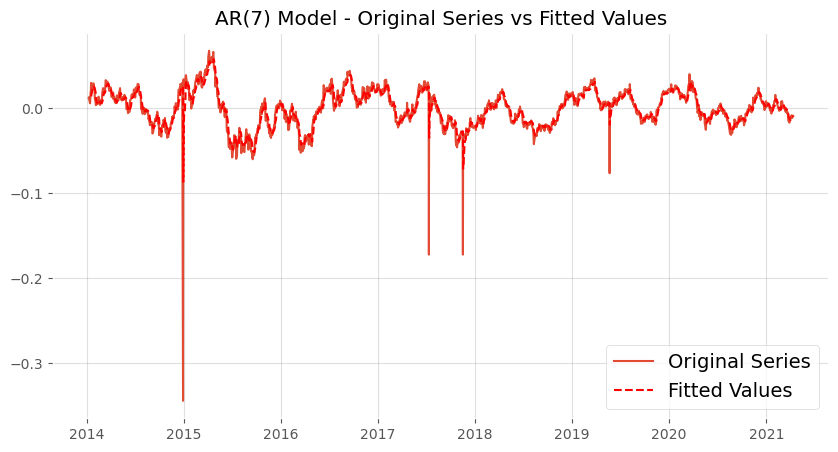

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

data = train[col2] - b*train[col1] - a

# Convert the data to a pandas Series
series = pd.Series(data, name='MSPREAD')
series = series.sort_index()[3:]

# Fit an AR(2) model
model = AutoReg(series, lags=7).fit()

# Print the model summary
print(model.summary())

# Extract the coefficients and statistics
coefficients = model.params
stderr = model.bse
tvalues = model.tvalues
pvalues = model.pvalues

# Create a summary table
summary_table = pd.DataFrame({
    'Coefficient': coefficients,
    'Std. Error': stderr,
    't-Statistic': tvalues,
    'Prob.': pvalues
})

# Display the summary table
print(summary_table)
# Plot the original series and fitted values
plt.figure(figsize=(10, 5))
plt.plot(series, label='Original Series')
plt.plot(model.fittedvalues, color='red', linestyle='--', label='Fitted Values')
plt.title('AR(7) Model - Original Series vs Fitted Values')
plt.legend()
plt.show()

## test arch effect

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch


# Create a pandas Series with the dates as the index
series = pd.Series(data, name='MSPREAD')


# Fit an AR(7) model
model = AutoReg(series, lags=7).fit()


# # Perform the ARCH test
# am = arch_model(model.resid, vol='ARCH', p=1)
# res = am.fit()

# # Print the ARCH model summary
# print(res.summary())

lm_test = het_arch(model.resid)
print(f"Lagrange Multiplier Test Statistic: {lm_test[0]}")
print(f"p-value: {lm_test[1]}")

Lagrange Multiplier Test Statistic: 22.805200601822353
p-value: 0.01148890758434547


## garch(1,1)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

series = pd.Series(data, name='MSPREAD')

# Fit an AR(7) model
model = AutoReg(series, lags=7).fit()
print(model.summary())
c,l1,l2,l3,l4,l5,l6,l7 = model.params

######
garch_model = arch_model(model.resid, vol='Garch', p=1, q=1).fit(disp='off')
forecast = garch_model.forecast(horizon=1)
sigma2_forecast = forecast.variance.iloc[-1, 0]
print(np.sqrt(sigma2_forecast))
#########
# Fit a GARCH(1,1) model
am = arch_model(model.resid, vol='Garch', p=1, q=1)
res = am.fit()

# Print the GARCH model summary
print(res.summary())

##########################if there still exist arch effect
std_resid = res.std_resid
# Perform Lagrange Multiplier Test for ARCH effects on standardized residuals
lm_test = het_arch(std_resid)
print(f"Lagrange Multiplier Test Statistic: {lm_test[0]}")
print(f"p-value: {lm_test[1]}")

                            AutoReg Model Results                             
Dep. Variable:                MSPREAD   No. Observations:                 1897
Model:                     AutoReg(7)   Log Likelihood                5599.209
Method:               Conditional MLE   S.D. of innovations              0.013
Date:                Sat, 08 Jun 2024   AIC                         -11180.417
Time:                        19:44:54   BIC                         -11130.518
Sample:                    01-14-2014   HQIC                        -11162.043
                         - 04-12-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.767e-05      0.000     -0.096      0.923      -0.001       0.001
MSPREAD.L1     0.3028      0.023     13.180      0.000       0.258       0.348
MSPREAD.L2     0.2028      0.024      8.460      0.0

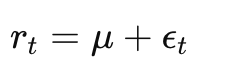
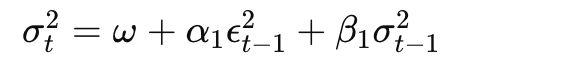

## get sigam2_t

In [53]:
########################################## OLS
col1 = "AUDSGD=X"
col2 = "NZDSGD=X"

pair = converted_us[[col1, col2]].copy()
pair = np.log(pair)

ratio = 0.7
train = pair[:int(len(pair)*ratio)]
test = pair[int(len(pair)*ratio):]

df = train
X = df[[col1]]
Y = df[col2]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

a = model.params[0]
b = model.params[1]
data = pair[col2] - b*pair[col1] - a

########################rolling window to get sigma2 and AR params
def rolling_forecast(data, ratio=0.7, ar_lags=7, garch_p=1, garch_q=1):
    num = int(len(data)*ratio)
    n = len(data)-num
    results = []
    for i in range(n):
        ar_model = AutoReg(data[i:num+i], lags=ar_lags).fit()
        c, l1, l2, l3, l4, l5, l6,l7 = ar_model.params
        garch_model = arch_model(ar_model.resid, vol='Garch', p=garch_p, q=garch_q).fit(disp='off')
        forecast = garch_model.forecast(horizon=1)
        sigma2_forecast = forecast.variance.iloc[-1, 0]
        results.append({
            "c": c,
            "l1": l1,
            "l2": l2,
            "l3": l3,
            "l4": l4,
            "l5": l5,
            "l6": l6,
            "l7": l7,
            "sigma": np.sqrt(sigma2_forecast)
        })
    
    return results
results = rolling_forecast(data)

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/lib/python3.11/si

In [54]:
df = pd.DataFrame(results, index=pair[int(len(pair)*0.7):].index)
test = pair[int(len(pair)*0.7):]
test = test[col2] - b*test[col1] - a
df = pd.concat([test, df], axis=1)
df = df.rename(columns={df.columns[0]: "spread"})
df["spread"] = (df["spread"] - 
                df["c"] - 
                df["l1"]*df["spread"].shift(1) -
                df["l2"]*df["spread"].shift(2) - 
                df["l3"]*df["spread"].shift(3) - 
                df["l4"]*df["spread"].shift(4) - 
                df["l5"]*df["spread"].shift(5) - 
                df["l6"]*df["spread"].shift(6) - 
                df["l7"]*df["spread"].shift(7))
df = df.dropna()
df

,spread,c,l1,l2,l3,l4,l5,l6,l7,sigma
Date,,,,,,,,,,
2021-04-22,0.003873,-0.000052,0.301530,0.202052,0.140015,0.099834,0.084033,0.059468,0.047868,0.011953
2021-04-23,0.001547,-0.000049,0.301588,0.202087,0.139990,0.099893,0.084026,0.059442,0.047774,0.011972
2021-04-26,0.001347,-0.000052,0.301637,0.201992,0.139888,0.099889,0.083850,0.059512,0.047847,0.011948
2021-04-27,0.000109,-0.000053,0.301556,0.202059,0.139838,0.099829,0.083862,0.059397,0.047922,0.011936
2021-04-28,-0.000374,-0.000052,0.301575,0.202077,0.139817,0.099839,0.083872,0.059380,0.047945,0.011924
...,...,...,...,...,...,...,...,...,...,...
2024-05-20,0.001293,-0.000256,0.407479,0.223688,0.119945,0.077814,0.066814,0.042237,0.033293,0.009096
2024-05-21,-0.000200,-0.000255,0.407525,0.223690,0.119871,0.077791,0.066761,0.042244,0.033369,0.074647
2024-05-22,-0.001985,-0.000253,0.407496,0.223730,0.119819,0.077687,0.066829,0.042195,0.033574,0.007177


## generate signal

In [55]:
def assign_values(df):
    if (df["spread"] > df["sigma"] ) & (df["spread"] < 2*df["sigma"]):
        return 1
    elif (df["spread"] > -2*df["sigma"]) & (df["spread"] < -df["sigma"]):
        return -1
    elif (df["spread"] > -0.2*df["sigma"])&(df["spread"] < 0.2*df["sigma"]):
        return 0
    elif (df["spread"] < -2*df["sigma"])|(df["spread"] > 2*df["sigma"]):
        return 0
    else:
        return 0

df["signal"] = df.apply(assign_values, axis=1)

In [56]:
df

,spread,c,l1,l2,l3,l4,l5,l6,l7,sigma,signal
Date,,,,,,,,,,,
2021-04-22,0.003873,-0.000052,0.301530,0.202052,0.140015,0.099834,0.084033,0.059468,0.047868,0.011953,0
2021-04-23,0.001547,-0.000049,0.301588,0.202087,0.139990,0.099893,0.084026,0.059442,0.047774,0.011972,0
2021-04-26,0.001347,-0.000052,0.301637,0.201992,0.139888,0.099889,0.083850,0.059512,0.047847,0.011948,0
2021-04-27,0.000109,-0.000053,0.301556,0.202059,0.139838,0.099829,0.083862,0.059397,0.047922,0.011936,0
2021-04-28,-0.000374,-0.000052,0.301575,0.202077,0.139817,0.099839,0.083872,0.059380,0.047945,0.011924,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,0.001293,-0.000256,0.407479,0.223688,0.119945,0.077814,0.066814,0.042237,0.033293,0.009096,0
2024-05-21,-0.000200,-0.000255,0.407525,0.223690,0.119871,0.077791,0.066761,0.042244,0.033369,0.074647,0
2024-05-22,-0.001985,-0.000253,0.407496,0.223730,0.119819,0.077687,0.066829,0.042195,0.033574,0.007177,0
